In [2]:
#pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.10.0-py3-none-any.whl (5.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.1-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing libraries

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:/Users/AKSHAY LATHWAL/Desktop/Capstone/Final Model/2,3 vs 4"
CATEGORIES = ['2,3','4']

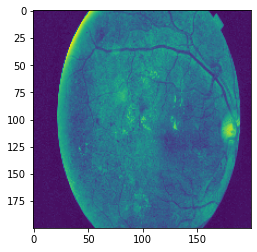

In [6]:
# a loop to read 1 image of a category to check if the code would work 
IMG_SIZE = 200
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw)
        plt.imshow(final_img)
        plt.show()
        break
    break

In [7]:
# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 200
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 5)
                img = clahe.apply(image_bw)
                final_img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
                
                #final_img = np.expand_dims(img, axis = -1)
            except:
                continue
            training_data.append([final_img,class_num])
            
create_training_data()


In [8]:
len(training_data)

2145

In [9]:
# empty lists to append images and labels
X = []
y = []

In [10]:
# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

In [11]:
len(X),len(y)

(2145, 2145)

In [12]:
# importing library
from sklearn.model_selection import train_test_split

In [13]:
# splitting the data into train and test datasets
y_train = y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [14]:
# normalising the data

X_train = X/255
#X_test = X_test/255

In [15]:
# converting the train and test data into arrays

X_train = np.array(X_train)
#X_test = np.array(X_test)

In [16]:
#Laoding Val_Test data
DATADIR ="C:/Users/AKSHAY LATHWAL/Desktop/Capstone/Final Model/Val_Test(2,3 vs 4)"
CATEGORIES = ['2,3','4']

# creating the val_test dataset 
validation_data = []
IMG_SIZE = 200
def create_validation_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 5)
                final_img = clahe.apply(image_bw)
                final_img = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)
            except:
                continue
            validation_data.append([final_img,class_num])

create_validation_data()

In [17]:
# empty lists to append images and labels
X = []
y = []
# appending images to list X and labels to list Y
for features,label in validation_data:
    X.append(features)
    y.append(label)
X = np.array(X)

# normalising the data
X_test = X/255
y_test = y

# converting the train and test data into arrays
X_test = np.array(X_test)

In [18]:
X_test.shape

(177, 200, 200, 3)

In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [20]:
pre_trained_model = InceptionV3(input_shape = (200, 200, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [21]:
last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 768)


In [52]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
#x= layers.AveragePooling2D((5,5))(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.35)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.00001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

last layer output shape:  (None, 10, 10, 768)


In [53]:
len(X_train),len(y_train)

(2145, 2145)

In [54]:
model.fit(np.array(X_train), np.array(y_train), epochs=5)
#history = model.fit(
#            X_train,y_train)

Epoch 1/5
68/68 [==============================] - 310s 4s/step - loss: 0.2109 - acc: 0.9543
Epoch 2/5
68/68 [==============================] - 289s 4s/step - loss: 0.0307 - acc: 0.9921
Epoch 3/5
68/68 [==============================] - 290s 4s/step - loss: 0.0209 - acc: 0.9925
Epoch 4/5
68/68 [==============================] - 289s 4s/step - loss: 0.0188 - acc: 0.9925
Epoch 5/5
68/68 [==============================] - 290s 4s/step - loss: 0.0191 - acc: 0.9925


In [55]:
y_pred = model.predict(X_test)
y_pred[:20]

6/6 [==============================] - 4s 527ms/step


array([[4.2192645e-02],
       [8.9498055e-05],
       [9.9999350e-01],
       [4.2413554e-01],
       [1.3552545e-04],
       [1.5102432e-07],
       [9.6265185e-01],
       [5.0445978e-04],
       [2.9749053e-03],
       [2.9267353e-06],
       [5.1768473e-10],
       [4.8323753e-05],
       [1.0075829e-09],
       [5.0217742e-01],
       [9.8762794e-06],
       [1.8182509e-01],
       [2.9198435e-10],
       [9.0095244e-02],
       [2.9409790e-05],
       [1.0764783e-10]], dtype=float32)

In [71]:
y_pred_class=[]
for i in y_pred:
    if i>0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 

In [72]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       152
           1       0.69      0.44      0.54        25

    accuracy                           0.89       177
   macro avg       0.80      0.70      0.74       177
weighted avg       0.88      0.89      0.88       177



In [45]:
#y_pred_class

In [58]:
confusion_matrix(y_test, y_pred_class)

array([[147,   5],
       [ 14,  11]], dtype=int64)

In [73]:
model.save('v3_4vs23_.h5')

In [48]:
model.fit(np.array(X_train), np.array(y_train), epochs=10)
#history = model.fit(
#            X_train,y_train)

Epoch 1/10
68/68 [==============================] - 262s 4s/step - loss: 0.0331 - acc: 0.9907
Epoch 2/10
68/68 [==============================] - 254s 4s/step - loss: 0.0340 - acc: 0.9897
Epoch 3/10
68/68 [==============================] - 250s 4s/step - loss: 0.0349 - acc: 0.9893
Epoch 4/10
68/68 [==============================] - 250s 4s/step - loss: 0.0244 - acc: 0.9921
Epoch 5/10
68/68 [==============================] - 250s 4s/step - loss: 0.0270 - acc: 0.9911
Epoch 6/10
68/68 [==============================] - 251s 4s/step - loss: 0.0304 - acc: 0.9897
Epoch 7/10
68/68 [==============================] - 251s 4s/step - loss: 0.0348 - acc: 0.9897
Epoch 8/10
68/68 [==============================] - 253s 4s/step - loss: 0.0270 - acc: 0.9897
Epoch 9/10
68/68 [==============================] - 254s 4s/step - loss: 0.0209 - acc: 0.9925
Epoch 10/10
68/68 [==============================] - 257s 4s/step - loss: 0.0728 - acc: 0.9893


In [49]:
model.save('v3_4vs23_2.h5')

In [50]:
y_pred = model.predict(X_test)
y_pred_class=[]
for i in y_pred:
    if i>0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_class))

6/6 [==============================] - 3s 467ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       152
           1       0.50      0.44      0.47        25

    accuracy                           0.86       177
   macro avg       0.70      0.68      0.69       177
weighted avg       0.85      0.86      0.85       177



In [51]:
confusion_matrix(y_test, y_pred_class)

array([[141,  11],
       [ 14,  11]], dtype=int64)